In [1]:
# set up environment by importing all necessary libraries.

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

import numpy as np

In [2]:
# load dataset and drop N/A
df = pd.read_csv('./data/vgsales.csv').dropna()
print(df.shape)

(16291, 11)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
# convert some attributes to it's proper type
df['Year'] = df['Year'].astype('int64')

In [5]:
# create new attribute region sales share
df['NA_share'] = df['NA_Sales'] / df['Global_Sales']
df['EU_share'] = df['EU_Sales'] / df['Global_Sales']
df['JP_share'] = df['JP_Sales'] / df['Global_Sales']

In [6]:
df.sort_values(by='NA_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.951254,0.022254,0.009890
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,0.766689,0.074686,0.139458
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807


In [7]:
df.sort_values(by='EU_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394
10,11,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,0.366317,0.444265,0.077948
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,0.327570,0.433178,0.045327


In [8]:
df.sort_values(by='JP_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,0.389610,0.267532,0.311688
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,0.379207,0.307564,0.216594
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,0.349673,0.246187,0.328976


In [9]:
df.sort_values(by='Global_Sales', ascending=False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789


In [10]:
region_sales_df = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Genre').sum()

In [11]:
# create new attribute region sales share
region_sales_df['NA_share'] = region_sales_df['NA_Sales'] / region_sales_df['Global_Sales']
region_sales_df['EU_share'] = region_sales_df['EU_Sales'] / region_sales_df['Global_Sales']
region_sales_df['JP_share'] = region_sales_df['JP_Sales'] / region_sales_df['Global_Sales']
region_sales_df['Other_share'] = region_sales_df['Other_Sales'] / region_sales_df['Global_Sales']

In [12]:
region_sales_df.sort_values(by='NA_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Platform,445.99,200.65,130.65,51.51,829.13,0.537901,0.242001,0.157575,0.062125
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Puzzle,122.01,50.52,56.68,12.47,242.21,0.503736,0.208579,0.234012,0.051484
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


In [13]:
region_sales_df.sort_values(by='JP_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Role-Playing,326.50,187.57,350.29,59.38,923.83,0.353420,0.203035,0.379171,0.064276
Strategy,67.83,44.84,49.10,11.23,173.27,0.391470,0.258787,0.283373,0.064812
Puzzle,122.01,50.52,56.68,12.47,242.21,0.503736,0.208579,0.234012,0.051484
Adventure,101.93,63.74,51.99,16.70,234.59,0.434503,0.271708,0.221621,0.071188
Fighting,220.74,100.00,87.15,36.19,444.05,0.497106,0.225200,0.196262,0.081500


In [14]:
region_sales_df.sort_values(by='EU_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Racing,356.93,236.31,56.61,76.68,726.76,0.491125,0.325155,0.077894,0.105509
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Simulation,181.78,113.02,63.54,31.36,389.98,0.466126,0.289810,0.162931,0.080414
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318


In [15]:
region_sales_df.sort_values(by='Other_share', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Racing,356.93,236.31,56.61,76.68,726.76,0.491125,0.325155,0.077894,0.105509
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Misc,396.92,211.77,106.67,73.92,789.87,0.502513,0.268107,0.135048,0.093585


In [16]:
region_sales_df.sort_values(by='Global_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_share,EU_share,JP_share,Other_share
Genre,,,,,,,,,
Action,861.77,516.48,158.65,184.92,1722.84,0.500203,0.299784,0.092086,0.107334
Sports,670.09,371.34,134.76,132.65,1309.24,0.511816,0.283630,0.102930,0.101318
Shooter,575.16,310.45,38.18,101.90,1026.20,0.560476,0.302524,0.037205,0.099298
Role-Playing,326.50,187.57,350.29,59.38,923.83,0.353420,0.203035,0.379171,0.064276
Platform,445.99,200.65,130.65,51.51,829.13,0.537901,0.242001,0.157575,0.062125


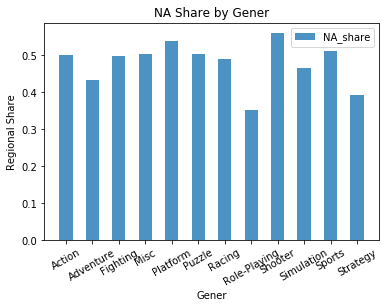

In [17]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect1 = ax.bar(index, region_sales_df['NA_share'], bar_width, alpha=opacity, label='NA_share')
plt.xlabel('Gener')
plt.ylabel('Regional Share')
plt.title('NA Share by Gener')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.show()

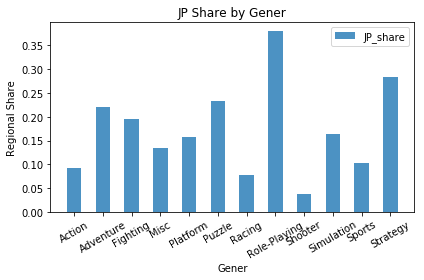

In [18]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect2 = plt.bar(index, region_sales_df['JP_share'], bar_width, alpha=opacity, label='JP_share')
plt.xlabel('Gener')
plt.ylabel('Regional Share')
plt.title('JP Share by Gener')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

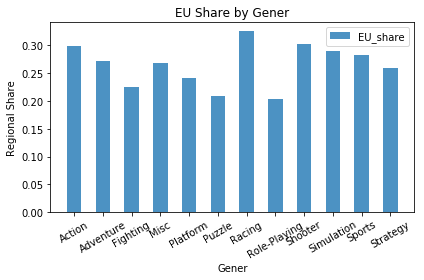

In [19]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect3 = plt.bar(index, region_sales_df['EU_share'], bar_width, alpha=opacity, label='EU_share')
plt.xlabel('Gener')
plt.ylabel('Regional Share')
plt.title('EU Share by Gener')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

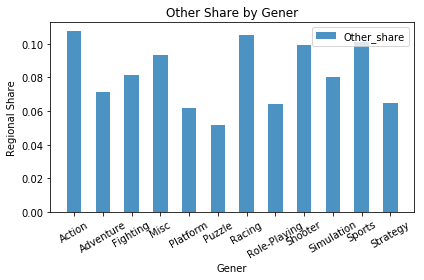

In [20]:
fig, ax = plt.subplots()
index = np.arange(len(region_sales_df.index))
bar_width = 0.5
opacity = 0.8
rect3 = plt.bar(index, region_sales_df['Other_share'], bar_width, alpha=opacity, label='Other_share')
plt.xlabel('Gener')
plt.ylabel('Regional Share')
plt.title('Other Share by Gener')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

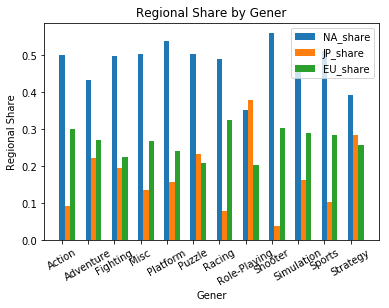

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(len(region_sales_df.index))
bar_width = 0.2
rect1 = ax.bar(index, region_sales_df['NA_share'], bar_width, label='NA_share')
rect2 = ax.bar(index + bar_width, region_sales_df['JP_share'], bar_width, label='JP_share')
rect3 = ax.bar(index + 2 * bar_width, region_sales_df['EU_share'], bar_width, label='EU_share')
plt.xlabel('Gener')
plt.ylabel('Regional Share')
plt.title('Regional Share by Gener')
plt.xticks(index, region_sales_df.index, fontsize=10, rotation=30)
plt.legend()
plt.show()